In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd
feats = pd.read_parquet("../generated_files/features.parquet")

In [3]:
## TEMPERATURE
## BIOVAR1, BIOVAR2, BIOVAR3, BIOVAR4, BIOVAR5, BIOVAR6, BIOVAR6
temperature = feats[['BIOVAR1','BIOVAR2','BIOVAR3','BIOVAR4','BIOVAR5','BIOVAR6','BIOVAR7']].copy()

## PRECIPTATION
## BIOVAR8, BIOVAR9, BIOVAR10, BIOVAR11, BIOVAR12
preciptation = feats[['BIOVAR9','BIOVAR10','BIOVAR11','BIOVAR12']].copy()

## indice_aridez_umidade_rasters
## BIOVAR13, BIOVAR14
aridez = feats[['BIOVAR13','BIOVAR14']].copy()

## numero_medio_de_dias_chuvosos
## BIOVAR15, BIOVAR16, BIOVAR17, BIOVAR18, BIOVAR19
chuvosos = feats[['BIOVAR15','BIOVAR16','BIOVAR17','BIOVAR18','BIOVAR19']].copy()

## vegetacao
## Cultivated_and_Managed_Vegetation, Deciduous_Broadleaf_Tree, Evergreen_Broadleaf_Tree,
## Herbaceous_Vegetation, Mixed_Other_Tree, Open_Water, Regularl Flooded_Vegetation, Shrub 
vegetacao = feats[['Cultivated_and_Managed_Vegetation', 'Deciduous_Broadleaf_Trees', 'Evergreen_Broadleaf_Trees',
'Herbaceous_Vegetation', 'Mixed_Other_Trees', 'Open_Water', 'Regularly_Flooded_Vegetation', 'Shrubs']].copy()

relevo = feats[['vegetacao_ibge1992_br','solos2001_br', 'sa2001tree_br', 'exposicao_br', 'density3_br','declividade_br', 'altitude_br']].copy()

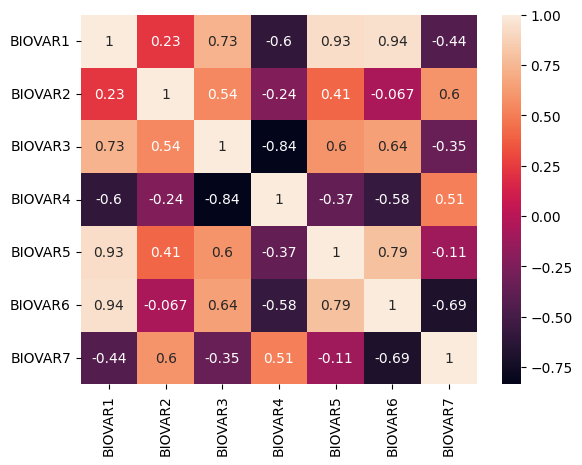

In [4]:
correlation_matrix = temperature.corr()
ax = sns.heatmap(correlation_matrix, annot=True)

In [5]:
## Vamos verificar com o BIOVAR1 e sem o BIOVAR5, BIOVAR6
## Verificar como BIOVAR3 <-> BIOVAR4
temperature_filtered = temperature[['BIOVAR1','BIOVAR2','BIOVAR4','BIOVAR7']].copy()

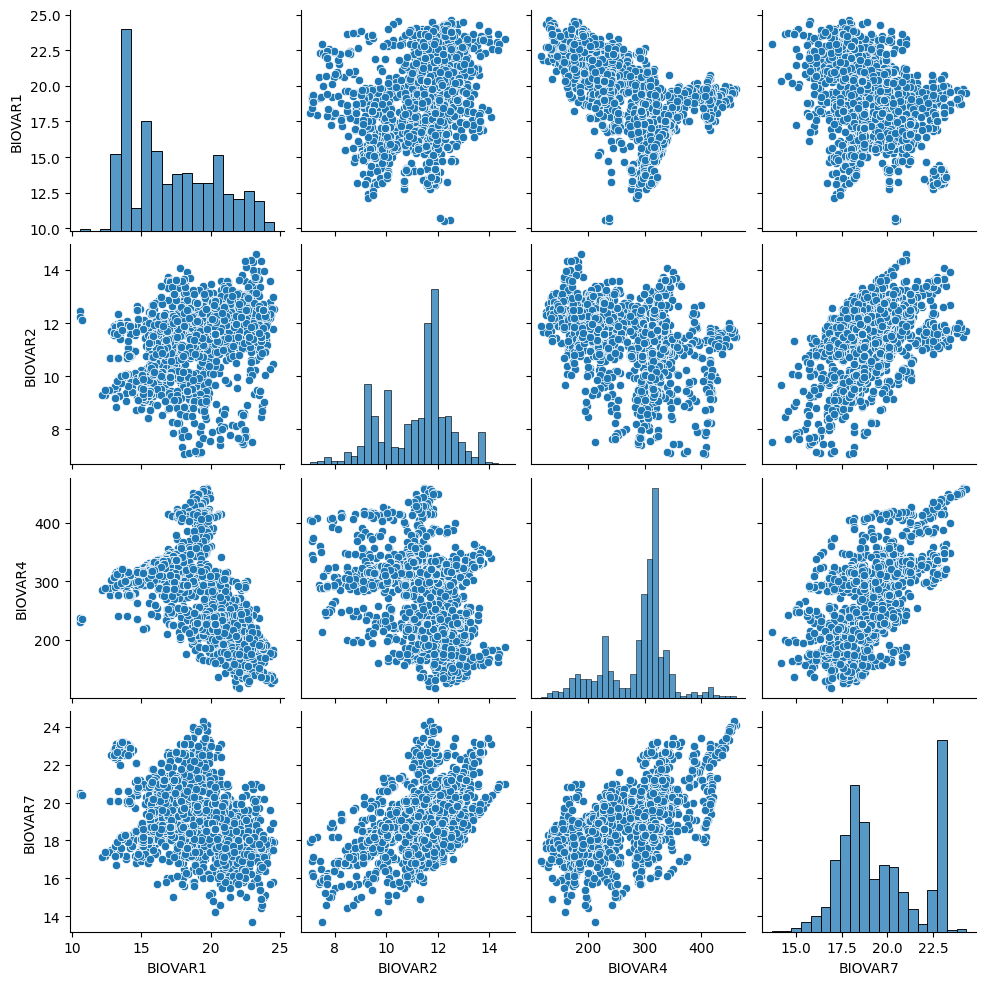

In [6]:
sns.pairplot(temperature_filtered)
plt.show()

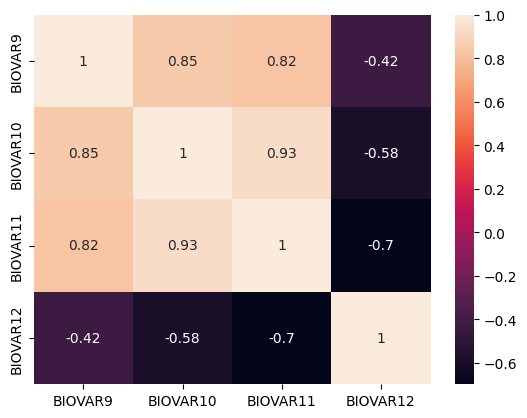

In [7]:
correlation_matrix = preciptation.corr()
ax = sns.heatmap(correlation_matrix, annot=True)


In [8]:
## Vamos verificar com o BIOVAR9 e sem o BIOVAR10, BIOVAR11
preciptation_filtered = preciptation[['BIOVAR9','BIOVAR12']].copy()

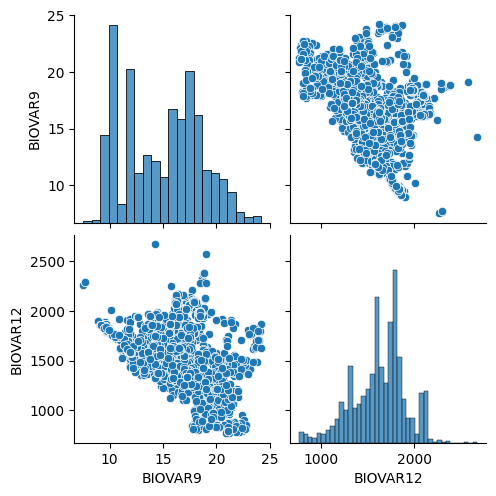

In [9]:
sns.pairplot(preciptation_filtered)
plt.show()

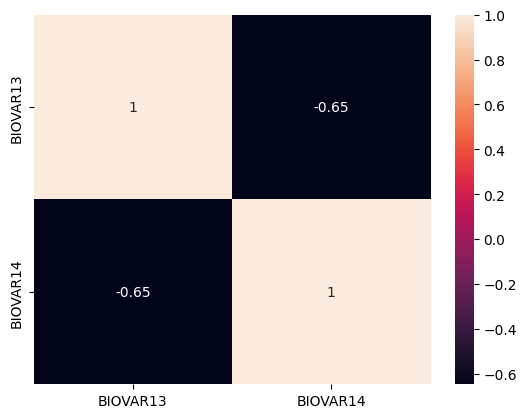

In [10]:
correlation_matrix = aridez.corr()
ax = sns.heatmap(correlation_matrix, annot=True)

In [11]:
## Vamos verificar com o BIOVAR13 E BIO14
aridez_filtered = aridez[['BIOVAR13']].copy()

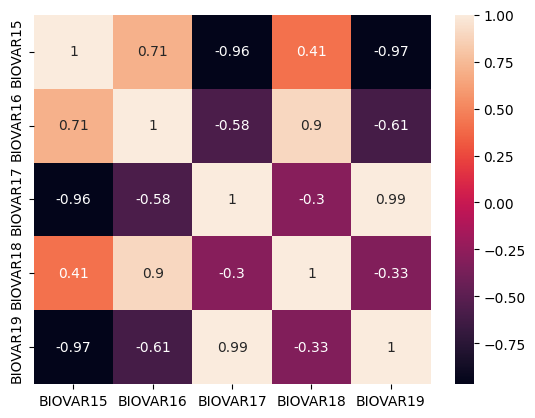

In [12]:
correlation_matrix = chuvosos.corr()
ax = sns.heatmap(correlation_matrix, annot=True)


In [13]:
## Vamos verificar com o BIOVAR15
chuvosos_filtered = chuvosos[['BIOVAR15']].copy()

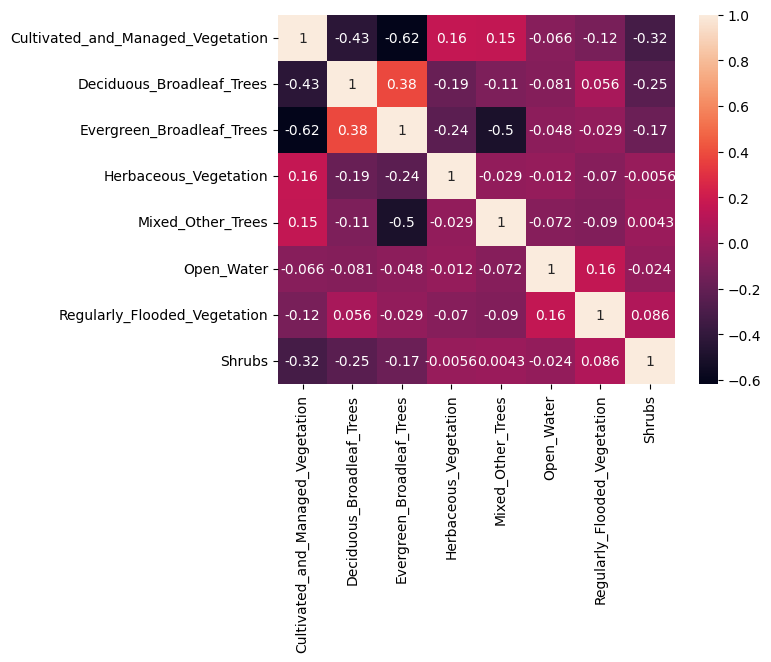

In [14]:
correlation_matrix = vegetacao.corr()
ax = sns.heatmap(correlation_matrix, annot=True)

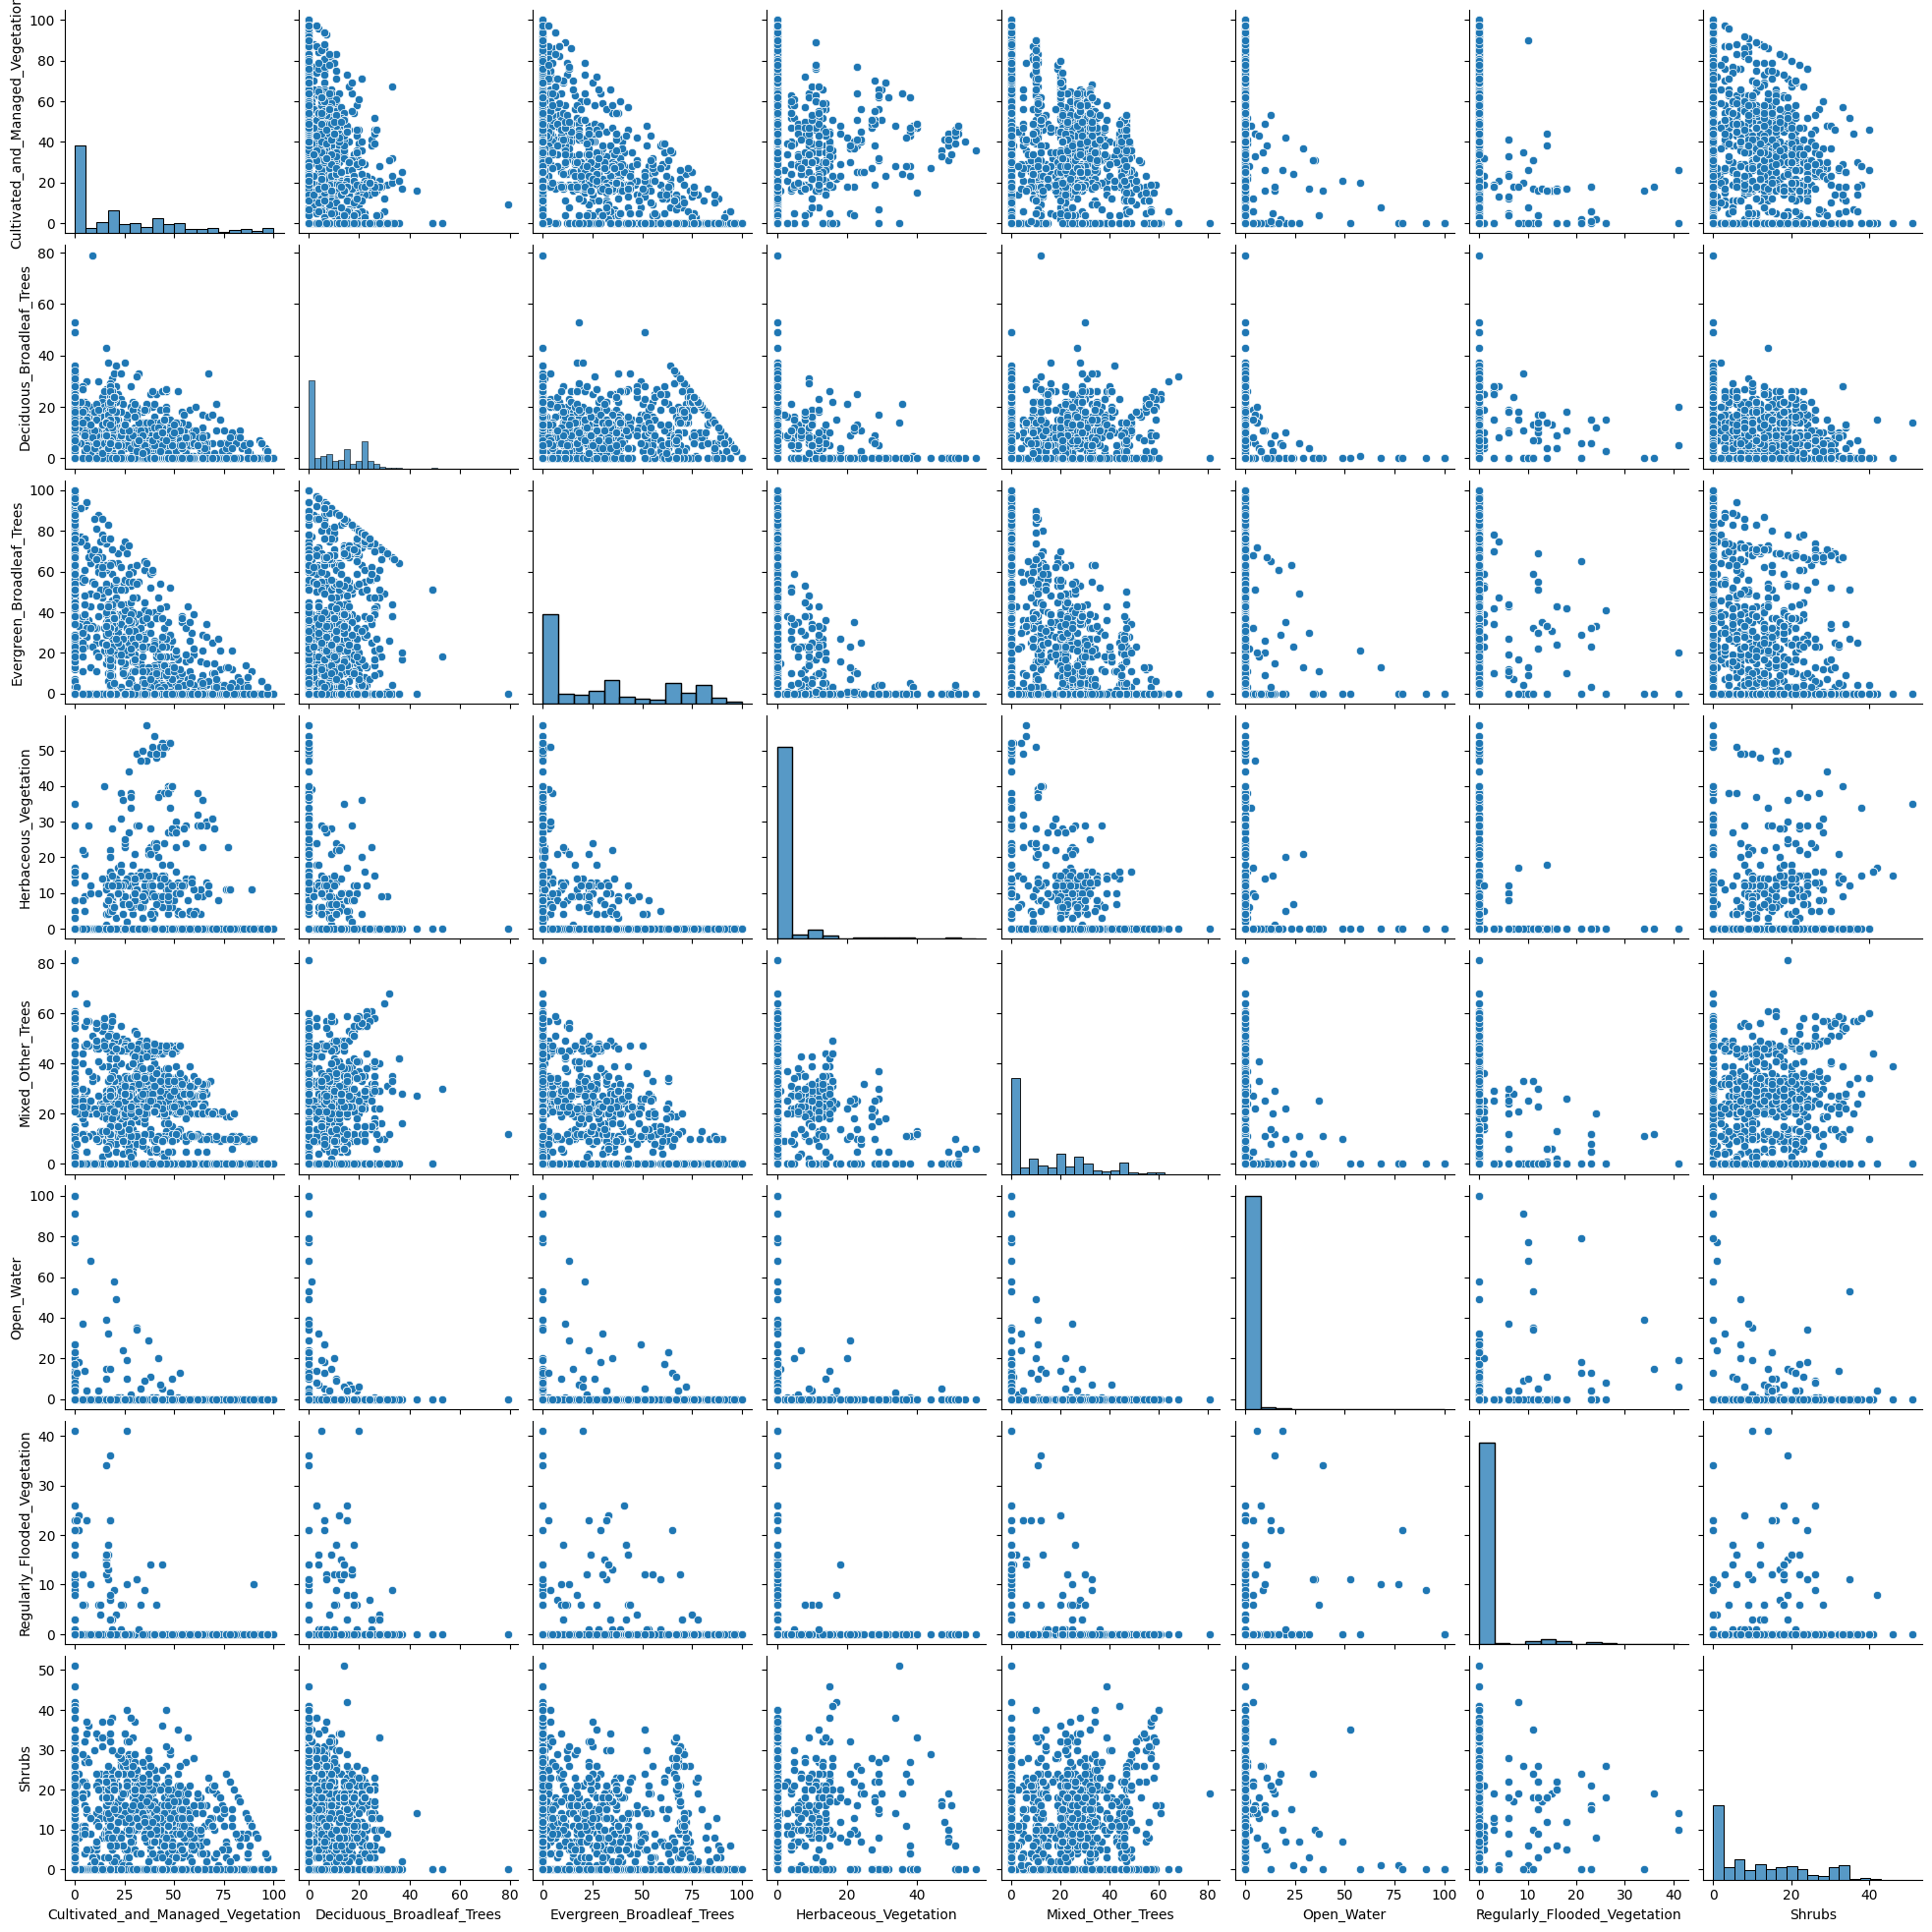

In [15]:
sns.pairplot(vegetacao)
plt.show()

In [16]:
## Columns to remove
## Regularly_flooded_vegetation, Open_water, Mixed_other_trees, Herbaceous_vegetation
vegetacao_filtered = vegetacao[['Cultivated_and_Managed_Vegetation','Deciduous_Broadleaf_Trees','Evergreen_Broadleaf_Trees','Shrubs']].copy()

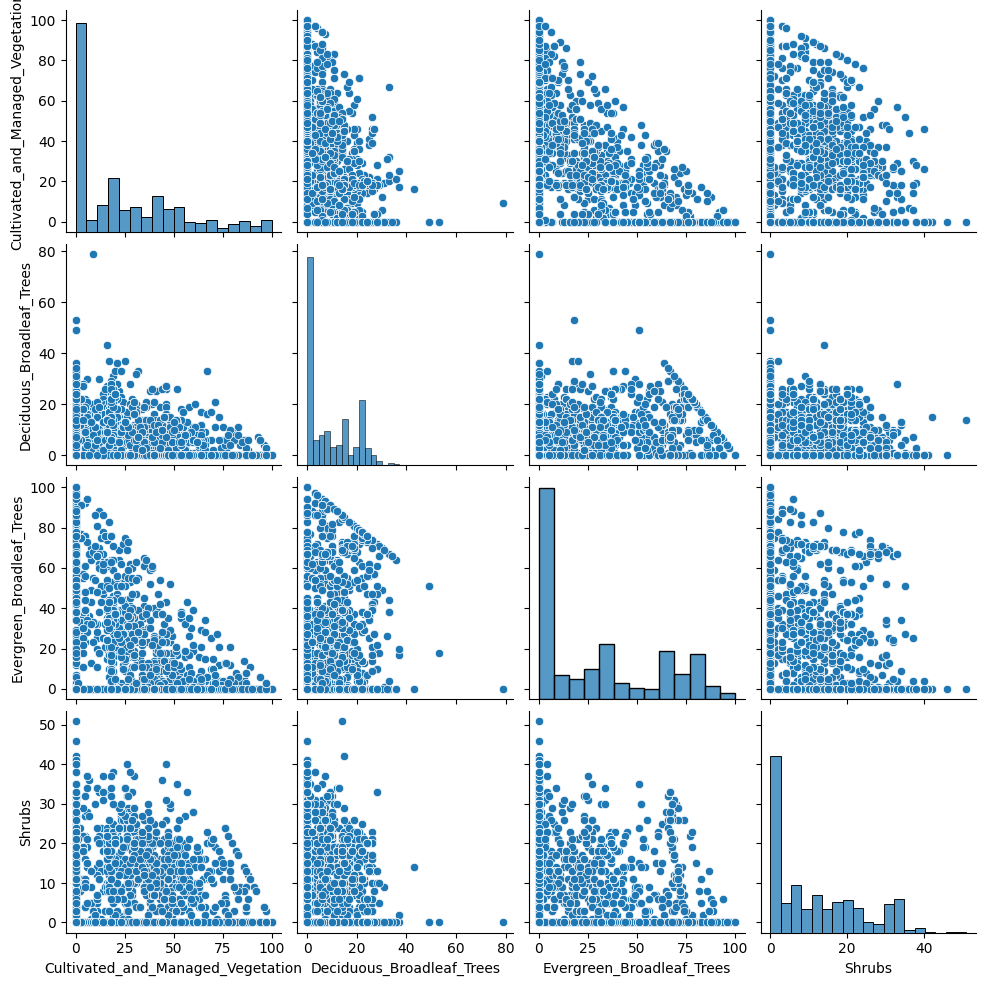

In [17]:
sns.pairplot(vegetacao_filtered)
plt.show()

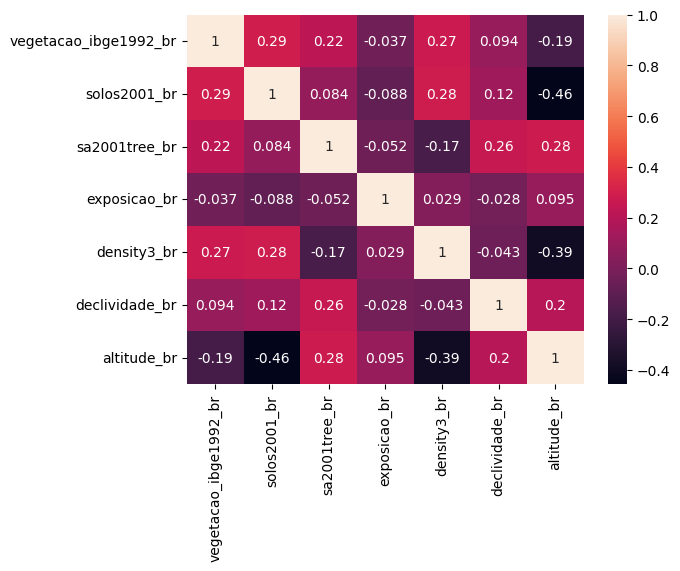

In [18]:
correlation_matrix = relevo.corr()
ax = sns.heatmap(correlation_matrix, annot=True)


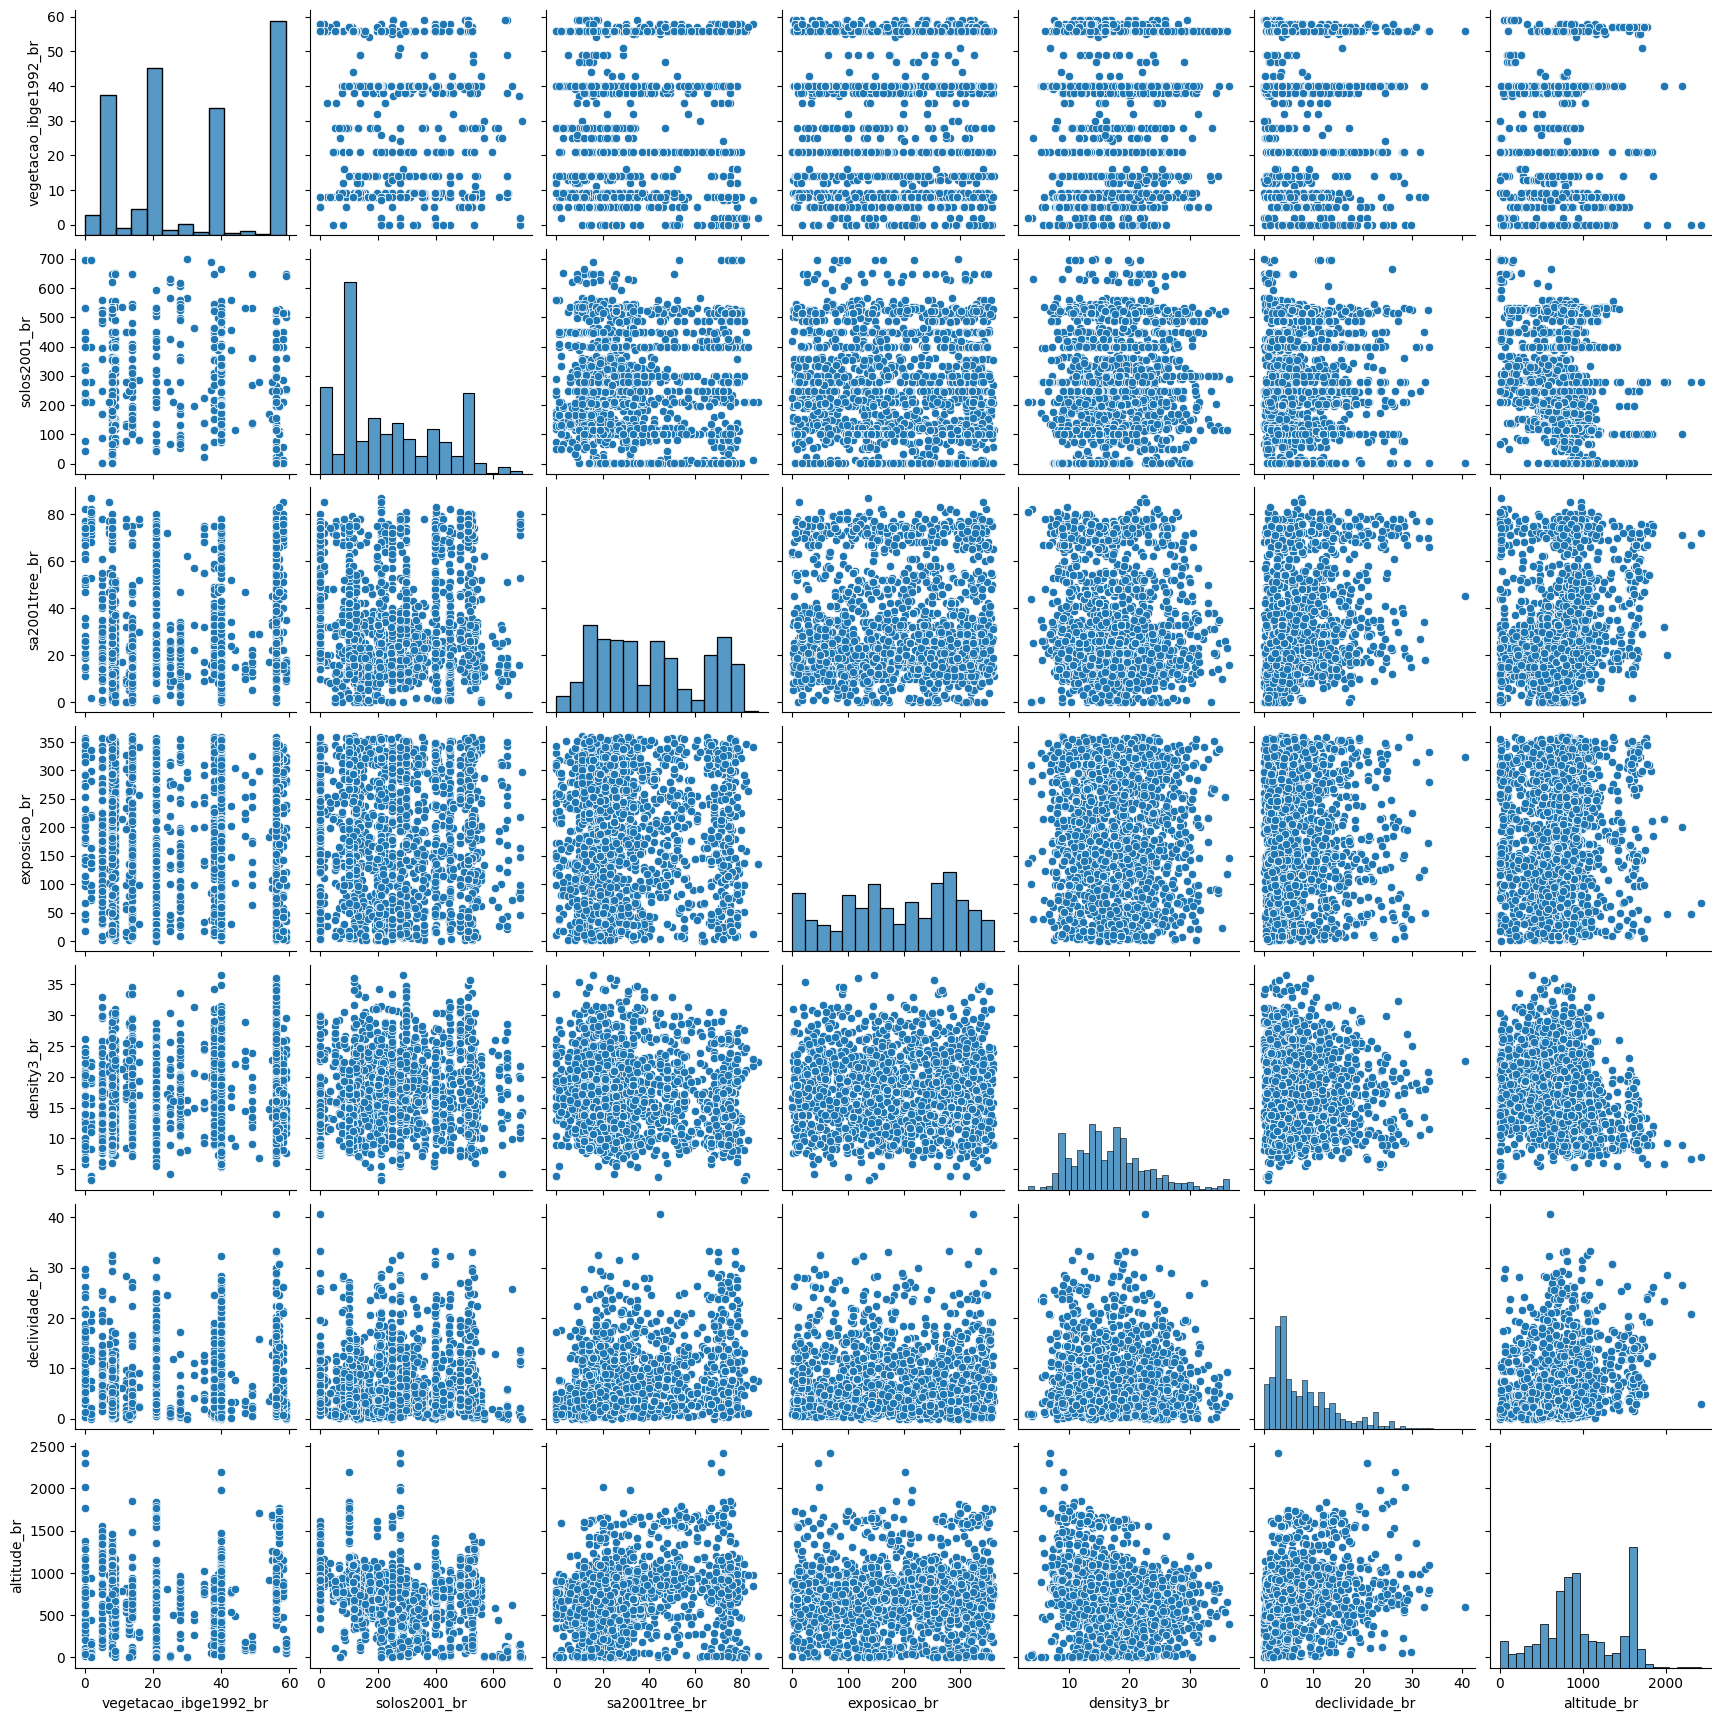

In [19]:
sns.pairplot(relevo)
plt.show()

In [20]:
final_selected_columns = [
    'BIOVAR1','BIOVAR2','BIOVAR4','BIOVAR7',
    'BIOVAR9','BIOVAR12',
    'BIOVAR13',
    'Cultivated_and_Managed_Vegetation','Deciduous_Broadleaf_Trees','Evergreen_Broadleaf_Trees','Shrubs',
    'vegetacao_ibge1992_br','solos2001_br', 'sa2001tree_br', 'exposicao_br', 'density3_br','declividade_br', 'altitude_br',
    'Presence'
]
feats_filtered = feats[final_selected_columns]

In [21]:
feats_filtered.to_parquet("../generated_files/features_filtered.parquet")